In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\abc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [5]:
x = df.drop(columns = ['Survived'])

In [6]:
y = df['Survived']


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [8]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [9]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [10]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

In [11]:
mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [12]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

In [13]:
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [14]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
551,27.0,26.0000,0,27.00,27.000000,26.0000,26.0000
287,22.0,7.8958,0,22.00,22.000000,7.8958,7.8958
245,44.0,90.0000,2,44.00,44.000000,90.0000,90.0000
260,NaN,7.7500,0,28.75,29.785904,7.7500,7.7500
604,35.0,26.5500,0,35.00,35.000000,26.5500,26.5500


In [15]:
print('Original Age variable variance:', x_train['Age'].var())

Original Age variable variance: 204.34951339046142


In [16]:
print('Age variancve afte median imputation:',x_train['Age_median'].var())

Age variancve afte median imputation: 161.98956633460548


In [17]:
print('Age variance after mean imputation:',x_train['Age_mean'].var())

Age variance after mean imputation: 161.81262452718676


In [18]:
print('Original Fare variable variance:', x_train['Fare'].var())

Original Fare variable variance: 2448.1979137063163


In [19]:
print('fge variancve afte median imputation:',x_train['Fare_median'].var())

fge variancve afte median imputation: 2340.09102197536


In [20]:
print('fare variancve afte mean imputation:',x_train['Fare_mean'].var())

fare variancve afte mean imputation: 2324.2385256705534


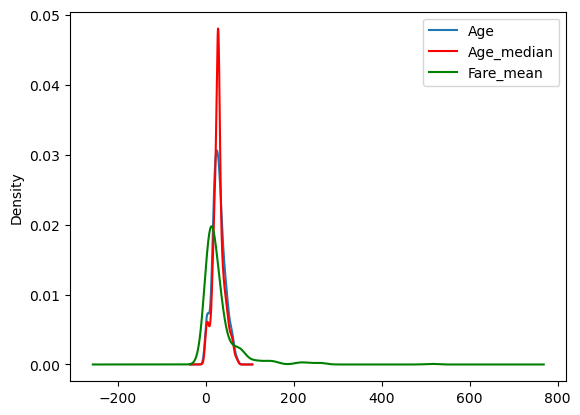

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original value distribution

x_train['Age'].plot(kind = 'kde',ax = ax)
 
    
#variable imputed with the median
x_train['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')

# variable imputed with mean
x_train['Fare_mean'].plot(kind = 'kde',ax = ax, color = 'green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

In [25]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [26]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

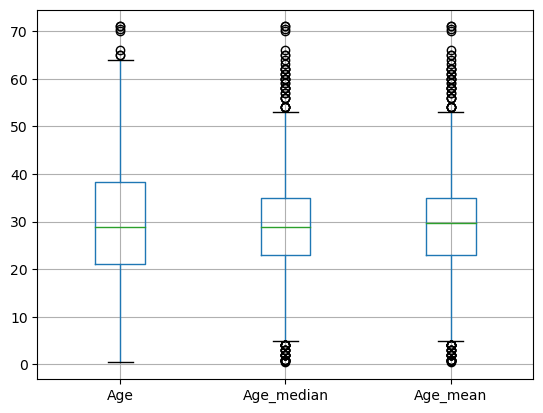

In [27]:
x_train[['Age','Age_median','Age_mean']].boxplot()

# using scikit learn

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [33]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [34]:
trf= ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder = 'passthrough')

In [35]:
trf.fit(xtrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [38]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [39]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [40]:
xtrain = trf.transform(xtrain)
xtest = trf.transform(xtest)

In [41]:
xtrain

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])